## Data exploration and tidy data

### Objectives
* Tidy data, from theory to practice
* Explore raw data

### Notes
* Online course resource in R [link](https://rmagno.eu/tdvr.oct.22/). Some commands in R are shown as first line comment in the cells.



In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

## 1. Raw data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = '/content/drive/MyDrive/Tidy_Python_2025/'
!mkdir -p $gdrive_path

%cd $gdrive_path

Mounted at /content/drive
/content/drive/MyDrive/Tidy_Python_2025


In [4]:
!rm -r 2025-tidy-python
!git clone https://github.com/Py-ualg/2025-tidy-python.git

rm: cannot remove '2025-tidy-python': No such file or directory
Cloning into '2025-tidy-python'...
remote: Enumerating objects: 1027, done.
remote: Counting objects: 100% (1027/1027), done.
remote: Compressing objects: 100% (976/976), done.
remote: Total 1027 (delta 149), reused 888 (delta 48), pack-reused 0 (from 0)
Receiving objects: 100% (1027/1027), 20.36 MiB | 11.21 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [ ]:
#@title Getting single file from the internet
# !wget https://github.com/Py-ualg/2025-tidy-python/blob/main/r2py/raw-data-python/2020-01-18_area1.csv

In [5]:
data_raw_path = gdrive_path+'2025-tidy-python/r2py/raw-data-python/'

In [6]:
!find . -name \*2020-0\*.csv |sort

./2025-tidy-python/r2py/raw-data-python/2020-01-02_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-01-02_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-02-23_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-02-23_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-03-16_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-03-16_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-04-12_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-04-12_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-05-21_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-05-21_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-06-04_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-06-04_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-07-27_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-07-27_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-08-21_ra.csv
./2025-tidy-python/r2py/raw-data-python/2020-08-21_rf.csv
./2025-tidy-python/r2py/raw-data-python/2020-09-29_ra.csv
./2025-tidy-py

In [7]:
# quadrats01 <- readxl::read_excel(file.path(data_raw_path, "quadrats.xlsx"))
quadrats01  = pd.read_excel(os.path.join(data_raw_path, 'quadrats.xlsx'))
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


In [8]:
# df1_q1 <- readr::read_csv(file.path(data_raw_path, "2020-01-02_q1.csv"))
df1_ra = pd.read_csv(os.path.join(data_raw_path, '2020-01-02_ra.csv')).reset_index(drop=True)
# df1_rf <- readr::read_csv(file.path(data_raw_path, "2020-01-02_rf.csv"))
df1_rf = pd.read_csv(os.path.join(data_raw_path, '2020-01-02_rf.csv')).reset_index(drop=True)
df1_ra.shape, df1_rf.shape

((299, 17), (359, 17))

In [9]:
df1_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          299 non-null    int64  
 1   species_name        299 non-null    object 
 2   sex                 296 non-null    object 
 3   stage               299 non-null    object 
 4   is_gravid?          158 non-null    object 
 5   behavior            299 non-null    object 
 6   associated_species  299 non-null    object 
 7   depth [m]           299 non-null    float64
 8   cl [cm]             299 non-null    float64
 9   cw [cm]             299 non-null    float64
 10  lcl [cm]            299 non-null    float64
 11  rcl [cm]            299 non-null    float64
 12  fw [cm]             299 non-null    float64
 13  date                299 non-null    object 
 14  latitude            1 non-null      float64
 15  longitude           1 non-null      float64
 16  id      

In [10]:
df1_ra.describe()

,Unnamed: 0,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],fw [cm],latitude,longitude,id
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,1.0,1.00,299.000000
mean,149.000000,6.247492,1.902508,1.924322,2.598113,-8.055162,3.579811,37.1,-8.62,149.000000
std,86.458082,2.105988,1.323093,1.371357,1.859646,99.938487,0.088794,NaN,NaN,86.458082
min,0.000000,1.000000,0.199341,0.135430,0.185840,-999.000000,3.363636,37.1,-8.62,0.000000
25%,74.500000,5.000000,0.876006,0.868216,1.208547,0.899810,3.545455,37.1,-8.62,74.500000
50%,149.000000,6.000000,1.590909,1.612838,2.139971,1.625591,3.545455,37.1,-8.62,149.000000
75%,223.500000,8.000000,2.602641,2.634138,3.521949,2.698264,3.636364,37.1,-8.62,223.500000
max,298.000000,11.000000,6.961568,8.109561,11.230465,7.376145,3.818182,37.1,-8.62,298.000000


In [11]:
# dplyr::glimpse(df1_ra)
df1_ra.T

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
species_name,u. olhanen.,A farensis,u. olhanen.,u. olhanen.,u. olhanen.,A farensis,u. olhanen.,U. olhanensis,A farensis,u. olhanen.,...,u. olhanen.,A. Farensis,u. olhanen.,u. olhanen.,U. olhanensis,A. Farensis,A farensis,A. Farensis,A farensis,U. olhanensis
sex,female,male or female,N/R,male,female,female,male or female,male,female,female,...,male,female,male,female,male,female,female,male,male,male or female
stage,j,s,s,a,a,j,p,a,p,j,...,p,j,j,j,a,a,j,s,s,s
is_gravid?,False,NaN,NaN,NaN,False,False,NaN,NaN,False,False,...,NaN,False,NaN,False,NaN,True,False,NaN,NaN,NaN
behavior,Collecting biofilm from sunken wood.,Side-stepping along sandy coastal floor.,Guarding eggs beneath body flap.,Swiftly dashing across exposed sand.,Gradual movement in cold conditions.,Vibrating antennae in flowing current.,Staying half-submerged in loose sand.,Retreating swiftly from perceived danger.,Inspecting remains of another crab.,Advancing toward bait in water.,...,Lying still to avoid detection.,Grazing on mollusks among debris.,Frequent pausing while exploring.,Claw snapping in diver confrontation.,Defensive claw movement in water.,Adopting threatening stance when approached.,Group migration across shallow seabed.,Nibbling detritus off seabed patches.,Claw shaking post-contact gesture.,Protecting territory in confined space.
associated_species,"['Sea Sponge', 'Shrimp', 'Sea Star']","['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",['Snail'],"['Sea Urchin', 'Polychaete Worm']","['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...","['Coral Fragment', 'Sea Anemone']","['Sea Anemone', 'Barnacle', 'Jellyfish', 'Sea ...","['Small Fish', 'Hermit Crab']","['Sea Sponge', 'Small Fish', 'Snail']","['Shrimp', 'Sea Star', 'Snail', 'Polychaete Wo...",...,"['Hermit Crab', 'Jellyfish', 'Algae', 'Crab (O...","['Crab (Other Species)', 'Small Fish', 'Sea Ur...","['Coral Fragment', 'Sea Sponge']","['Small Fish', 'Jellyfish', 'Coral Fragment']","['Small Fish', 'Sea Sponge', 'Sea Anemone']","['Hermit Crab', 'Snail']","['Jellyfish', 'Algae']","['Hermit Crab', 'Crab (Other Species)', 'Jelly...","['Hermit Crab', 'Sea Anemone', 'Sea Star', 'Se...",['Jellyfish']
depth [m],7.0,9.0,11.0,7.0,3.0,6.0,7.0,7.0,7.0,7.0,...,9.0,4.0,7.0,8.0,7.0,8.0,6.0,4.0,4.0,3.0
cl [cm],0.672986,3.522727,0.568182,3.272727,3.315087,0.428049,0.409091,3.954545,0.610122,1.336558,...,2.113636,0.425883,1.136364,0.416845,1.909091,2.591646,0.554886,2.5,0.454545,1.363636
cw [cm],0.749001,3.176997,0.591866,3.426632,3.12685,0.566278,0.31675,4.334143,0.465697,1.463282,...,1.781585,0.350325,1.540024,0.583566,1.723301,2.803252,0.46359,2.372539,0.475986,1.483318


1. This is typically not what you do in `pandas`, we shouw it here, because of R counterpart of `dplyr::glimpse(df1_ra)`, in python you typically do `df1_ra.head()`, however for wider tables, transposition is not a stupid idea.
2. We probably do not need the `Unnamed: 0` and `id` columns

In [12]:
# colnames(df1_ra)
df1_ra.columns  # index might be difficult to work with, get list by simply: list(df1_ra.columns)

Index(['Unnamed: 0', 'species_name', 'sex', 'stage', 'is_gravid?', 'behavior',
       'associated_species', 'depth [m]', 'cl [cm]', 'cw [cm]', 'lcl [cm]',
       'rcl [cm]', 'fw [cm]', 'date', 'latitude', 'longitude', 'id'],
      dtype='object')

In [13]:
 # in R: (nrow() and ncol())
f"Table with {df1_ra.shape[0]} rows and {df1_ra.shape[1]} columns."

'Table with 299 rows and 17 columns.'

In [14]:
#@title Value counts in column
# table(df1_ra$stage)
df1_ra['stage'].value_counts()

,count
stage,
a,98
s,83
p,69
j,49


In [15]:
df1_rf['stage'].value_counts()

,count
stage,
adult,142
sub_adult,98
pre_puberty,66
juvenile,53


The "stage" column in has different labes for categories in the two data_frams. They will have to be standardized.

In [16]:
# Unique values in column
# unique(df1_ra$sex)
df1_ra['sex'].unique()

array(['female', 'male or female', 'N/R', 'male', ' ', '-', nan],
      dtype=object)

The "sex" categories will have to be cleaned.

In [17]:
df1_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          299 non-null    int64  
 1   species_name        299 non-null    object 
 2   sex                 296 non-null    object 
 3   stage               299 non-null    object 
 4   is_gravid?          158 non-null    object 
 5   behavior            299 non-null    object 
 6   associated_species  299 non-null    object 
 7   depth [m]           299 non-null    float64
 8   cl [cm]             299 non-null    float64
 9   cw [cm]             299 non-null    float64
 10  lcl [cm]            299 non-null    float64
 11  rcl [cm]            299 non-null    float64
 12  fw [cm]             299 non-null    float64
 13  date                299 non-null    object 
 14  latitude            1 non-null      float64
 15  longitude           1 non-null      float64
 16  id      

In [18]:
df1_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          359 non-null    int64  
 1   species             359 non-null    object 
 2   sex                 350 non-null    object 
 3   stage               359 non-null    object 
 4   is_gravid           162 non-null    object 
 5   behaviour           359 non-null    object 
 6   associated_species  359 non-null    object 
 7   depth [m]           359 non-null    float64
 8   cl [mm]             359 non-null    float64
 9   cw [mm]             359 non-null    float64
 10  lcl [mm]            359 non-null    float64
 11  rcl [mm]            359 non-null    float64
 12  fw [mm]             359 non-null    float64
 13  date                359 non-null    object 
 14  latitude            1 non-null      float64
 15  longitude           1 non-null      float64
 16  id      

### Comparing the species distribution of the two places

In [19]:
df1_ra['species_name'].value_counts()

,count
species_name,
u. olhanen.,82
A. Farensis,69
A farensis,67
U. olhanensis,60
Ucides alvorensis,21


In [20]:
df1_rf['species'].value_counts()

,count
species,
u. olhanen.,109
U. olhanensis,99
A farensis,68
A. Farensis,55
Ucides alvorensis,28


In [21]:
s1 = df1_ra['species_name'].value_counts().rename('Ria do Alvor')
s2 = df1_rf['species'].value_counts().rename('Ria Formosa')
df = pd.concat([s1,s2],axis=1)
#df.columns = ['Ria do Alvor', 'Ria Formosa']
df

,Ria do Alvor,Ria Formosa
u. olhanen.,82,109
A. Farensis,69,55
A farensis,67,68
U. olhanensis,60,99
Ucides alvorensis,21,28


<Axes: >

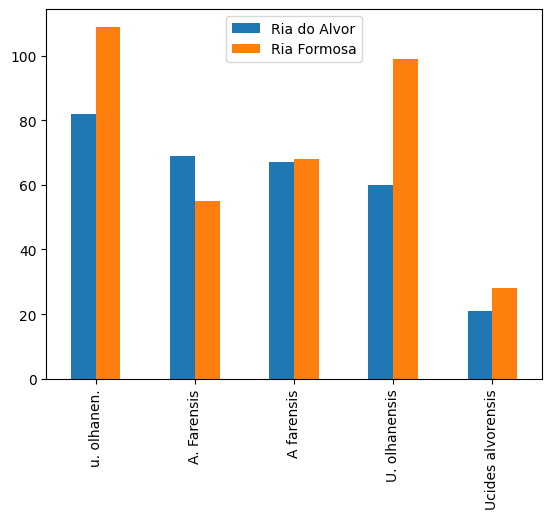

In [22]:
df.plot(kind='bar')

1. Another problem, we have inconsistent species names.
2. Since the the total counts are different, we need to normalize the data (conert to relative percentages) before comparing: